In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [3]:
rain = pd.read_csv('Rainfall.csv', index_col = 'Date', parse_dates = True)


In [19]:
rain

,Rainfall_mm
Date,
2022-01-01,18.905401
2022-01-02,41.538658
2022-01-03,32.948866
2022-01-04,59.196622
2022-01-05,59.825740
...,...
2023-11-27,47.997912
2023-11-28,36.331532
2023-11-29,51.609168


In [16]:
date_range = pd.date_range(start='2022-01-01',  periods=24, freq='M')
rain1 = pd.DataFrame(rain, index=date_range)

In [30]:
rain1.fillna(method = 'ffill', inplace = True)

In [31]:
rain1.isnull().sum()

Rainfall_mm    0
dtype: int64

<Axes: >

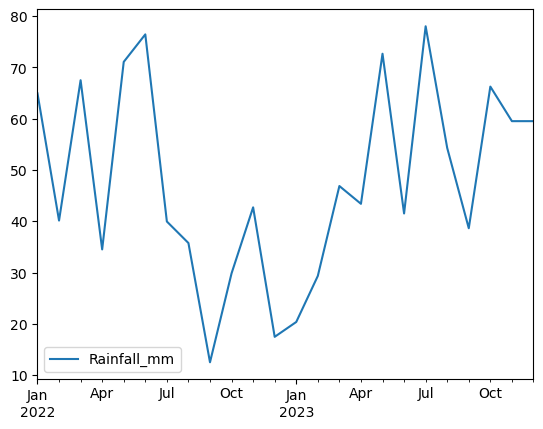

In [32]:
rain1.plot()


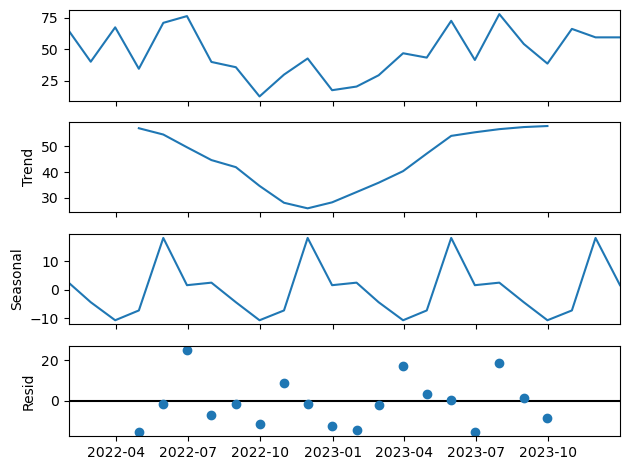

In [43]:
result = seasonal_decompose(rain1, model='additive', period = 6)
result.plot()
plt.show()

In [36]:
results = adfuller(rain1['Rainfall_mm'])[1] 

In [37]:
results

0.33664474892629

In [38]:
data_diff = rain1.diff().dropna()

In [39]:
p_value = adfuller(data_diff)[1]

In [40]:
p_value

0.00019065654177385783

In [41]:
train_size = len(rain1) - 4
rain_train = rain1.iloc[:train_size].copy()
rain_test = rain1.iloc[train_size:].copy()

In [272]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
auto_arima(rain_train, seasonal = False, trace = True,
          error_action = 'ignore', suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=187.888, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=215.220, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=188.588, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=205.449, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=186.504, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=184.969, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=185.996, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=184.006, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=186.000, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=180.267, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=180.310, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=181.957, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=182.080, Time

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [294]:
model = ARIMA(rain_train, order = (0,1,3))
model_fit = model.fit()

In [295]:
forecast = model_fit.forecast(steps = len(rain_test))
forecast

2023-09-30    59.866857
2023-10-31    55.110597
2023-11-30    46.685138
2023-12-31    46.685138
Freq: M, Name: predicted_mean, dtype: float64

In [296]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [297]:
MSE = mean_squared_error(forecast, rain_test)
MSE

226.1461081388004

In [298]:
RMSE =np.sqrt(MSE)
RMSE

15.038155077628385

In [299]:
MAE = mean_absolute_error(forecast,rain_test)
MAE


14.518080418604919

In [300]:
rain_test

,Rainfall_mm
2023-09-30,38.663900
2023-10-31,66.274221
2023-11-30,59.538008
2023-12-31,59.538008


In [301]:
residual = model_fit.resid

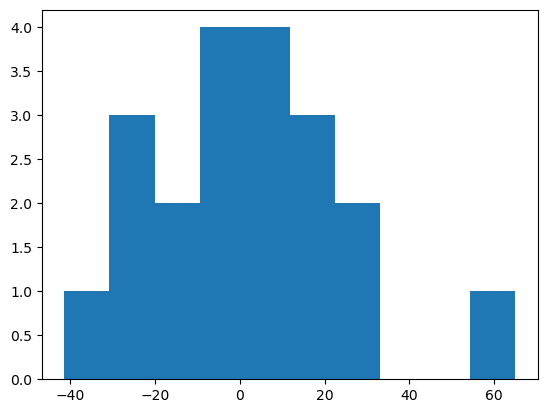

In [302]:
plt.hist(residual)
plt.show()